# Object Detection On Images using YOLO-V3

### Step 1:
1. Import cv2 and numpy libraries. 
2. Then we load yolo v3 algorithm using cv2.dnn.readNet by passing weights and cfg file. 
3. Then we will load all classes names in array using coco.names file.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
import numpy as np

In [5]:
cfg="/content/drive/MyDrive/YOLO/PD-CFG/yolov3_320.cfg"
weight="/content/drive/MyDrive/YOLO/Weights/yolov3-320.weights"
label="/content/drive/MyDrive/YOLO/coco.names"

In [6]:
#Load YOLO
net=cv2.dnn.readNetFromDarknet(cfg, weight) #Here we are creating our network which will read from darknet
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV) #here we are declarring that we are using open cv as a Backend 
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU) # here we are declaring our CPU


#### These are the 80 labels or categories YOLO V3 can identify.

In [7]:
with open(label,"rt") as f:#rt R stands for Read and T stands for Text
    Class=f.read()

print(type(Class))


<class 'str'>


In [8]:
Class=Class.split("\n")
#Here we had slice it to 80 cz intially it was having 81 element in which 81 was the space only
Class=Class[:80]
len(Class)

80

## Step 2:
- Next we will define output layers because that’s where we will be defining what object is detected by using __net.getUnconnectedOutLayers__ and __net.getLayerNames__.

- __getUnconnectedOutLayers() __: gives the names of the unconnected output layers, which are essentially the last layers of the network. 
- Then we run the forward pass of the network to get output from the output layers, as you will see  __(net.forward(getOutputsNames(net)))__.

In [9]:
net.getLayerNames()

['conv_0',
 'bn_0',
 'relu_0',
 'conv_1',
 'bn_1',
 'relu_1',
 'conv_2',
 'bn_2',
 'relu_2',
 'conv_3',
 'bn_3',
 'relu_3',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'relu_5',
 'conv_6',
 'bn_6',
 'relu_6',
 'conv_7',
 'bn_7',
 'relu_7',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'relu_9',
 'conv_10',
 'bn_10',
 'relu_10',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'relu_12',
 'conv_13',
 'bn_13',
 'relu_13',
 'conv_14',
 'bn_14',
 'relu_14',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'relu_16',
 'conv_17',
 'bn_17',
 'relu_17',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'relu_19',
 'conv_20',
 'bn_20',
 'relu_20',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'relu_22',
 'conv_23',
 'bn_23',
 'relu_23',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'relu_25',
 'conv_26',
 'bn_26',
 'relu_26',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'relu_28',
 'conv_29',
 'bn_29',
 'relu_29',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'relu_31',
 'conv_32',
 'bn_32',
 'relu_32',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'relu_34',
 'conv_35',
 'bn

In [10]:
net.getUnconnectedOutLayers()

array([[200],
       [227],
       [254]], dtype=int32)

In [11]:
layer_names = net.getLayerNames()
outputlayers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [12]:
outputlayers

['yolo_82', 'yolo_94', 'yolo_106']

In [13]:
colors= np.random.uniform(0,255,size=(len(Class),3))


### Step 3:
- Next let us load an image. We will reduce the height and width of our image to scale of 40% and 30%. And save all those values in height,width,channels variables for theoriginal image.

In [14]:
from google.colab.patches import cv2_imshow

In [15]:
#loading image
img = cv2.imread("/content/drive/MyDrive/YOLO/demo1.jpg")
height,width,channels = img.shape

- Let's view the image

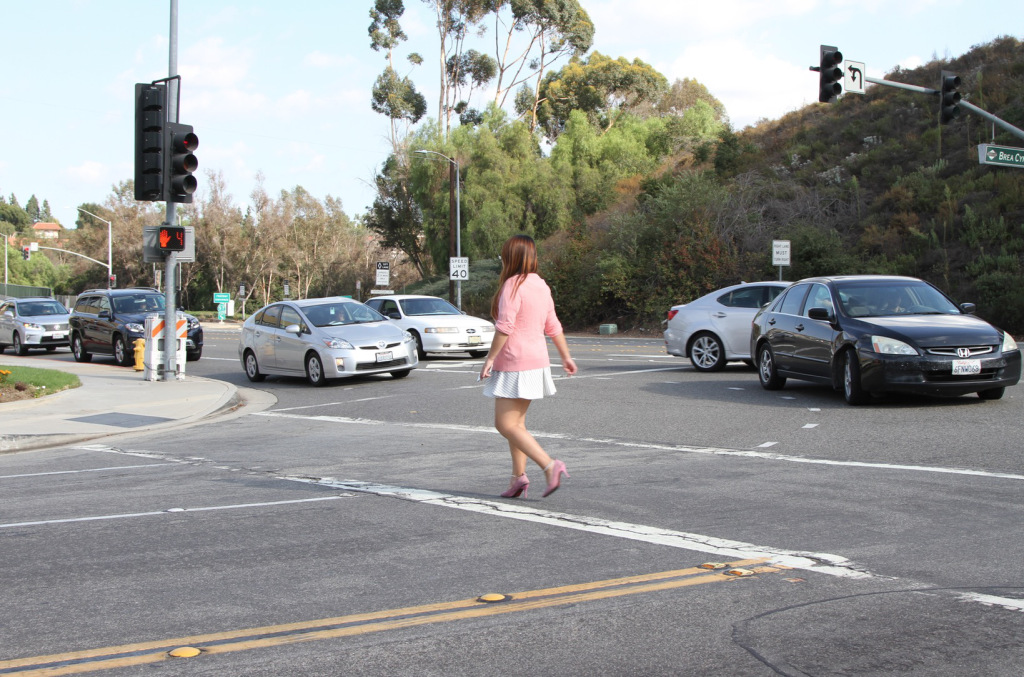

Shape of the image:(677, 1024, 3)


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
# To know the shape of images
def image_and_shapes(image):
    cv2_imshow(img)
    
    print("Shape of the image:{}".format(img.shape))

image_and_shapes("demo1.jpg")

- This is our original image from which we want to detect as many objects as possible. But we cannot give this image directly to algorithm.So we need to do some conversion from this image. This is called blob conversion which is basically extracting features from image.

- __We will detect objects in blob by using cv2.dnn.blobFromImage and passing few variables: img is file name, scalefactor of 0.00392, size of image to be used in blob be (416,416), no mean subtraction from layers as (0,0,0), setting True flag means we will be inverting blue with red since OpenCV uses BGR but we have channels in image as RGB.__

### cv.dnn.blobFromImage(img, scale, size, mean)
- __blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)__
- the image to transform
- the scale factor (1/255 to scale the pixel values to [0..1])
- the size, here a 416x416 square image
- the mean value (default=0)
- the option swapBR=True (since OpenCV uses BGR)

In [17]:
#detecting objects
blob = cv2.dnn.blobFromImage(img,1/255,(416,416),[0,0,0],1,crop=False)

- We now pass this blob to network using __net.setInput(blob)__ and then forward this to the __outputlayers__. Here all objects have been detected and outs contains all the information we need to instruct to extract the position of the object like top,left,right,bottom positions,name of class.

In [18]:
net.setInput(blob)
outs = net.forward(outputlayers)

In [19]:
print(outs[1])
print(outs[1].shape)

[[0.02455448 0.02167701 0.06298468 ... 0.         0.         0.        ]
 [0.0126716  0.02229969 0.29654258 ... 0.         0.         0.        ]
 [0.01953915 0.01497482 0.08162306 ... 0.         0.         0.        ]
 ...
 [0.97523445 0.9788389  0.04607124 ... 0.         0.         0.        ]
 [0.98243713 0.9774984  0.3595076  ... 0.         0.         0.        ]
 [0.98085    0.9850412  0.07386348 ... 0.         0.         0.        ]]
(2028, 85)


### Let's evaluate outs by showing information on screen.

In [20]:
#Showing info on screen/ get confidence score of algorithm in detecting an object in blob
class_ids=[]
confidences=[]
boxes=[]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        
        if confidence > 0.5:
            #onject detected
            center_x= int(detection[0]*width)
            center_y= int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
        
            #cv2.circle(img,(center_x,center_y),10,(0,255,0),2)
            #rectangle co-ordinaters
            x=int(center_x - w/2)
            y=int(center_y - h/2)
            #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            
            boxes.append([x,y,w,h]) #put all rectangle areas
            confidences.append(float(confidence)) #how confidence was that object detected and show that percentage
            class_ids.append(class_id) #name of the object tha was detected

In [21]:
confidences

[0.9976611733436584,
 0.756287693977356,
 0.791728675365448,
 0.8958119750022888,
 0.9968594908714294,
 0.9947369694709778,
 0.9995735883712769,
 0.9985435605049133,
 0.9713955521583557,
 0.830243706703186,
 0.8378934860229492,
 0.5496622323989868,
 0.9633190035820007]

In [22]:
class_ids

[2, 9, 2, 2, 2, 2, 2, 0, 9, 9, 9, 9, 2]

In [23]:
boxes

[[749, 275, 255, 130],
 [135, 92, 54, 112],
 [1, 292, 69, 64],
 [72, 290, 135, 77],
 [358, 294, 140, 65],
 [663, 277, 126, 92],
 [235, 296, 176, 91],
 [473, 236, 102, 267],
 [815, 46, 33, 55],
 [938, 71, 26, 53],
 [167, 124, 31, 78],
 [152, 227, 34, 23],
 [6, 296, 69, 55]]

- There might be cases that multiple time the same object might be detected like below.  We want to eliminate this.
- To eliminate this, we will use Non-Max Suppression(NMS) functionality. What this will do is eliminate the boxes by using some threshold value(any box having value less than 0.6- that will be removed) and it determines that keep only the best of all boxes. And indexes variable will keep track of such unique objects detected. So no multiple detection of same objects.

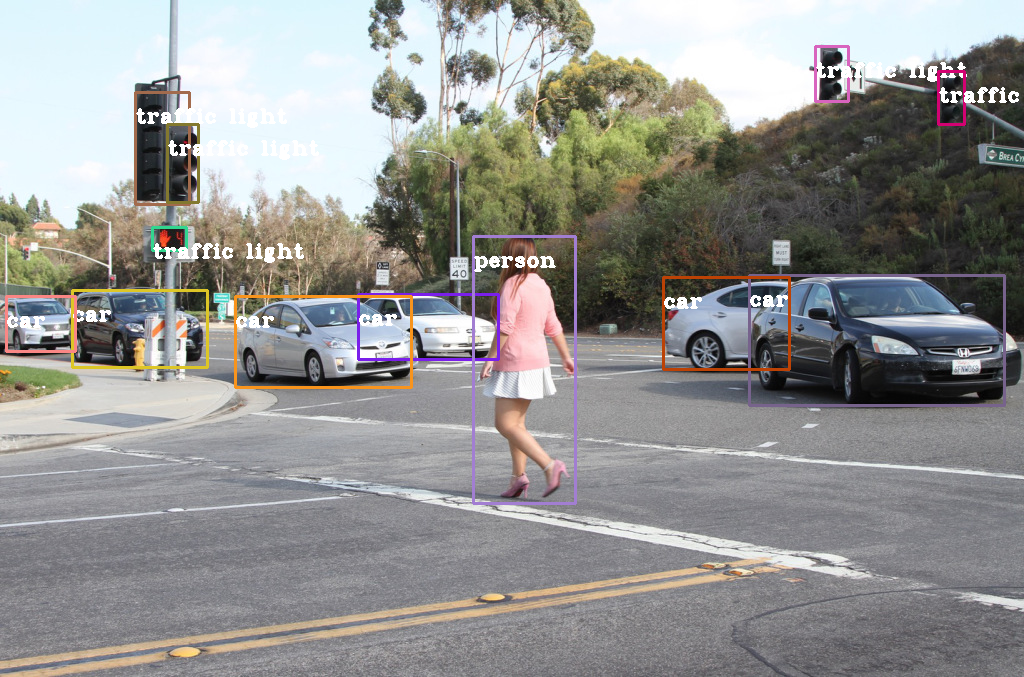

In [24]:
#cv2.dnn.NMSBoxes(boxes,confidences,score_threshold,IOU_threshold)
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.6)#Non Max Suppressions

'''Now using below loop over all found boxes, 
if box is appearing in indexes then only draw rectangle, color it,
put text of class name on it.'''
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(Class[class_ids[i]])
        color = colors[i] 
        cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
        cv2.putText(img,label,(x,y+30),font,1,(255,255,255),2)
            
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Now running it with Real Time

In [27]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [29]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [33]:
cfg2="/content/drive/MyDrive/YOLO/PD-CFG/yolov3_Tiny.cfg"
weight2="/content/drive/MyDrive/YOLO/Weights/yolov3-tiny.weights"
label="/content/drive/MyDrive/YOLO/coco.names"
net2=cv2.dnn.readNetFromDarknet(cfg2, weight2) #Here we are creating our network which will read from darknet
net2.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV) #here we are declarring that we are using open cv as a Backend 
net2.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU) # here we are declaring our CPU


In [38]:
#Extracting output layers
Outlayer=net2.getUnconnectedOutLayers()
Outlayer

array([[36],
       [48]], dtype=int32)

In [35]:
layernames2 = net2.getLayerNames()
layernames2

['conv_0',
 'bn_0',
 'relu_0',
 'pool_1',
 'conv_2',
 'bn_2',
 'relu_2',
 'pool_3',
 'conv_4',
 'bn_4',
 'relu_4',
 'pool_5',
 'conv_6',
 'bn_6',
 'relu_6',
 'pool_7',
 'conv_8',
 'bn_8',
 'relu_8',
 'pool_9',
 'conv_10',
 'bn_10',
 'relu_10',
 'pool_11',
 'conv_12',
 'bn_12',
 'relu_12',
 'conv_13',
 'bn_13',
 'relu_13',
 'conv_14',
 'bn_14',
 'relu_14',
 'conv_15',
 'permute_16',
 'yolo_16',
 'identity_17',
 'conv_18',
 'bn_18',
 'relu_18',
 'upsample_19',
 'concat_20',
 'conv_21',
 'bn_21',
 'relu_21',
 'conv_22',
 'permute_23',
 'yolo_23']

In [36]:
def findObjects(out,Images):
  height,width,channels = frame.shape
  boundingbox=[]
  classID= []
  confidence=[]  # We have made these 3 list because whenever we will find good values for bounding box, classID and confidence we will store it in these list only.

  for i in out:# as we are having the 3 outputs
    for j in i: #This is for each row 
      score=j[5:] #Removing the 1st 5 values we are not intersted in that right now
      ID=np.argmax(score) #getting out the column name / class name
      confs=score[ID] # Getting out the exact scores for it
      if confs > 0.5:
        w,h= int(j[2]*width), int(j[3]*height) # Here we are mulltiplying width and height because we want pixel values
        x,y=int(j[0]*width - w/2), int(j[1]*height - h/2)
        boundingbox.append([x,y,w,h])
        classID.append(ID)
        confidence.append(float(confs))
  print(len(boundingbox))

  indexes = cv2.dnn.NMSBoxes(boundingbox,confidence,0.4,0.6)#Non Max Suppressions

  '''Now using below loop over all found boxes, 
    if box is appearing in indexes then only draw rectangle, color it,
    put text of class name on it.'''
  font = cv2.FONT_HERSHEY_COMPLEX_SMALL
  for i in range(len(boundingbox)):
    if i in indexes:
        x,y,w,h = boundingbox[i]
        label = str(Class[classID[i]])
        color = colors[i] 
        cv2.rectangle(frame,(x,y),(x+w,y+h),color,2)
        cv2.putText(frame,label,(x,y+30),font,1,(255,255,255),2)

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])
    height,width,channels = frame.shape
    blob=cv2.dnn.blobFromImage(frame,1/255, (320,320),[0,0,0],1,crop=False) # Blob is the format that our DNN YoLo Architecture understands
    net2.setInput(blob)
        #Now we want to extract the output lay nmers from the network
        #Outlayer=net.getUnconnectedOutLayers() -- as we have already unconnected the layers
    layernames2 = net2.getLayerNames()
    extractOut=[layernames2[i[0]-1] for i in Outlayer]
    predictOut=net2.forward(extractOut) # As we have 3 input layers now we will extract the output from it
    print(type(predictOut))
    print(len(predictOut))
    print(predictOut[0].shape) 
    print(predictOut[1].shape) 
    findObjects(predictOut,frame)
    
                
    cv2_imshow(frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
        # create transparent overlay for bounding box
      